In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_usa=pd.read_csv("./youtube/USvideos.csv")
df_usa_comments= pd.read_csv("./youtube/UScomments.csv",error_bad_lines=False)

b'Skipping line 114463: expected 4 fields, saw 5\n'
b'Skipping line 142494: expected 4 fields, saw 8\nSkipping line 189730: expected 4 fields, saw 6\nSkipping line 245216: expected 4 fields, saw 7\n'


b'Skipping line 388428: expected 4 fields, saw 5\n'


In [3]:
print(df_usa_comments.head(5))

print(df_usa_comments['comment_text'])

      video_id                                       comment_text  likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️      4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...      3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me      3   
3  XpVt6Z1Gjjo                                MY FAN . attendance      3   
4  XpVt6Z1Gjjo                                         trending 😉      3   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0  
0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
5                                   #1 on trending AYYEEEEE
6                                      The end though 😭👍🏻❤️
7                                      #1 tre

In [4]:
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title,mask=None):
    plt.figure(figsize=(20,20))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    return wc
    

**To Count the frequency of words in Title column.**

     Word  Frequency
0  iphone         15
1   apple          7
2   video          6
3    good          5
4   steve          5
5    said          5
6     bed          5


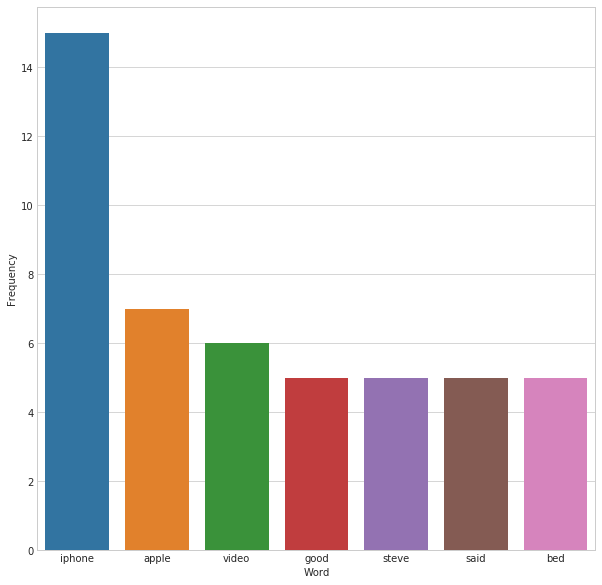

In [16]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

# a = df_usa_comments['comment_text'].str.lower().str.cat(sep=' ')
a = df_labelled['comment_text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

custom_stopwords = ["youtu","https","nhttps"]
stop_words.extend(custom_stopwords)


word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))
print(rslt.head(7))

**WordCloud for Title Column**

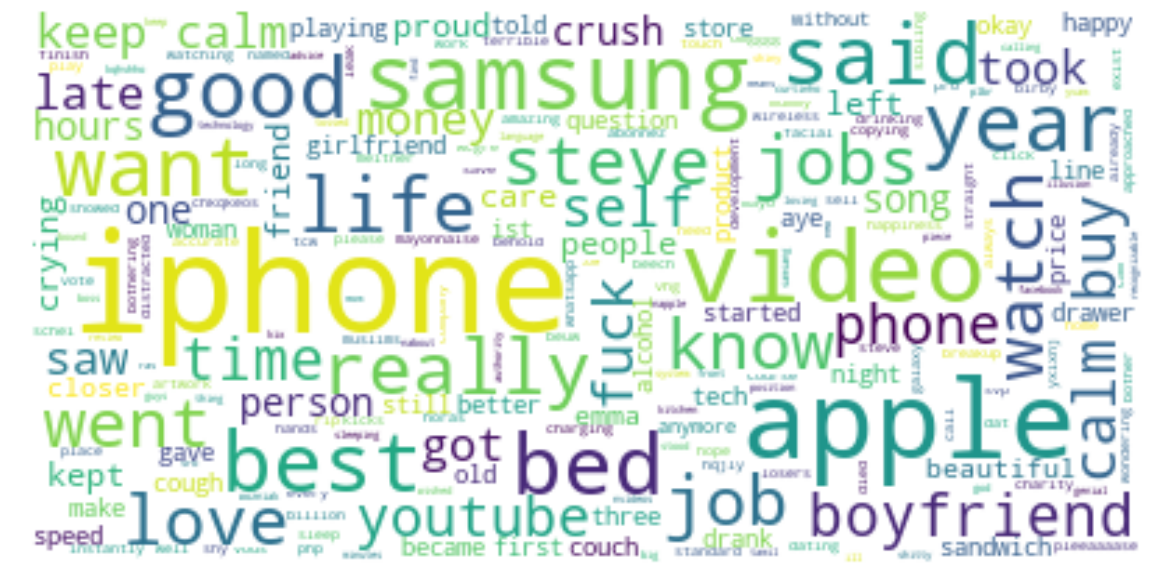

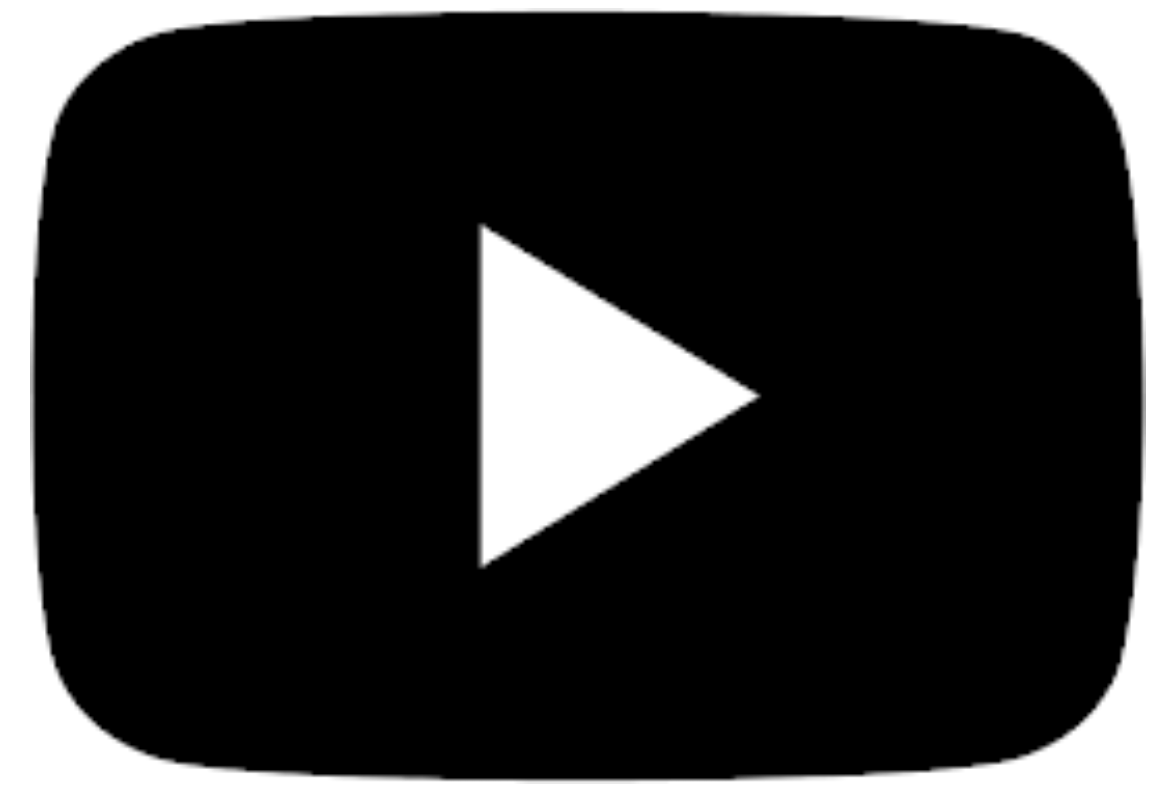

In [17]:
from PIL import Image
youtube_mask = np.array(Image.open("./youtube_logo_mask.png"))
word_cloud = wc(cleaned_data_title,'white','Common Words')

plt.figure(figsize= (20,20))
plt.imshow(youtube_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


In [18]:

word_cloud.to_file("./wordcloud_comments.png")

**To Count the frequency of words in Tags column.**

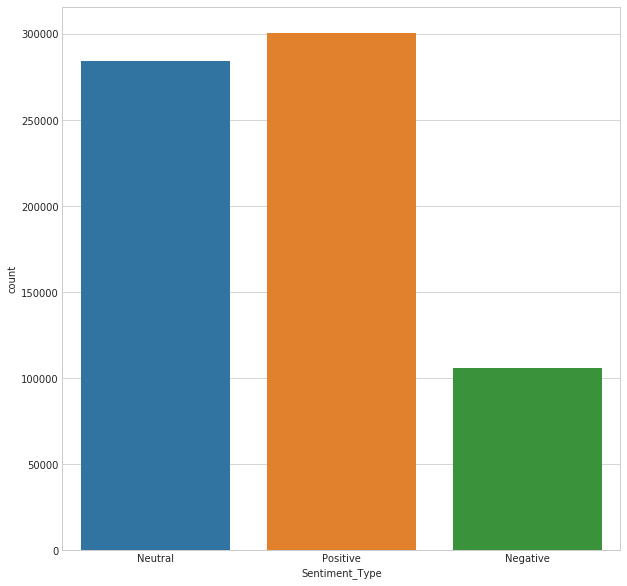

In [86]:
from textblob import TextBlob

bloblist_desc = list()

df_usa_descr_str=df_usa_comments['comment_text'].astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

In [90]:
ax.get_figure().savefig("sentiment_analysis.png")

In [5]:
df_labelled = pd.read_csv('youtube/Testset.csv')

       video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ                   To be there with a samsung phone      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease. Care is the cure� Keep c...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   

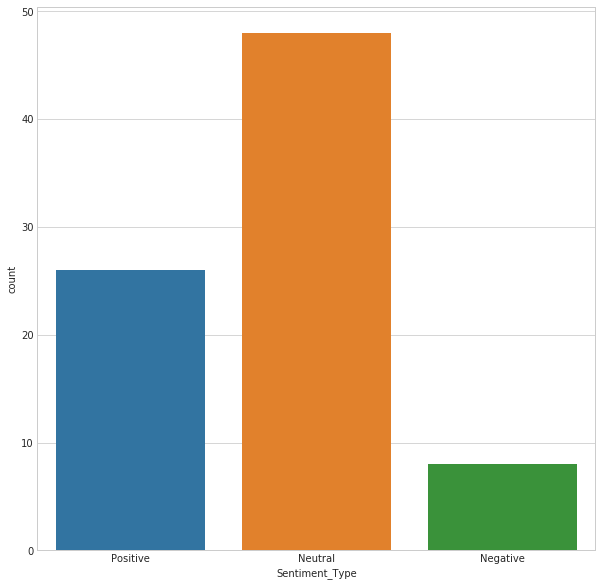

In [12]:
from textblob import TextBlob
bloblist_desc = list()


df_usa_descr_str=df_labelled['comment_text'].astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

In [10]:
ax.get_figure().savefig("sentiment_analysis_testset_labels.png")

In [110]:
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = 1
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = 0
    else:
        val = -1
    return val

df_usa_polarity_desc['sentiment_label'] = df_usa_polarity_desc.apply(f, axis=1)
df_usa_polarity_desc['label'] = df_labelled['labels']

correct_counter = 0
wrong = []
for i, row in df_usa_polarity_desc.iterrows():
    if row['label'] == row['sentiment_label']:
        correct_counter += 1
    else:
        wrong.append(row)

print("{} commments of the {} correct: {:0.2f}%".format(correct_counter,len(df_usa_polarity_desc),(correct_counter/len(df_usa_polarity_desc))*100))
print(df_usa_polarity_desc.head(5))

55 commments of the 82 correct: 67.07%
                                            sentence  sentiment  polarity  \
0  It's more accurate to call it the M+ (1000) be...       0.45  0.566667   
1                   To be there with a samsung phone       0.00  0.000000   
2  Thank gosh, a place I can watch it without hav...       0.00  0.000000   
3  What happened to the home button on the iPhone...       0.00  0.000000   
4  Power is the disease. Care is the cure� Keep c...       1.00  0.300000   

  Sentiment_Type  Sentiment_label  sentiment_label  label  
0       Positive                1                1      0  
1        Neutral                0                0      0  
2        Neutral                0                0      1  
3        Neutral                0                0     -1  
4       Positive                1                1     -1  
